In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

import pandasql as psql

# pip install pandasql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Loan data

loans = pd.read_csv(r"D:\00 Datasets\Others\Data-01\loan_data.csv", header=0)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# Change the name of variable

loans = loans.rename(columns = {'not.fully.paid': 'NFPaid'}, inplace = False)
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# Identify the category variables

cat_cols = ['purpose']

# Convert the catagory variable into dummy variables

loans = pd.get_dummies(loans,columns=cat_cols)
loans=pd.DataFrame(loans)
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [5]:
# Identify variables which are fit for scaling

cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']

In [6]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in loans.columns:
    if col != 'NFPaid':
        IndepVar.append(col)

TargetVar = 'NFPaid'

x = loans[IndepVar]
y = loans[TargetVar]

In [7]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 
x_test_F1 = x_test.copy()

In [8]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# SVM Algorithm

In [9]:
# Training the SVM algorithm 

from sklearn.svm import SVC

modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
modelSVMGaussian.fit(x_train, y_train)

# Predicting the values

y1_pred = modelSVMGaussian.predict(x_test)

# Confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y1_pred))
print(classification_report(y_test,y1_pred))

# Evalution metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y1_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y1_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y1_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

[[2408    0]
 [ 465    1]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       1.00      0.00      0.00       466

    accuracy                           0.84      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.86      0.84      0.76      2874

Accuracy: 83.82 %
Precision: 83.82 %
Recall: 83.82 %
f1-score: 83.82 %
roc_auc_score: 0.501


# RandomForest Algorithm

In [10]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                 criterion='gini', max_depth=None, max_features='auto',
                                 max_leaf_nodes=None, max_samples=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=500,
                                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                 warm_start=False)

modelRF = modelRF.fit(x_train, y_train)

# Predict the model with test data set

y2_pred = modelRF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y2_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y2_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

[[2397   11]
 [ 459    7]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.39      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.61      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874

Accuracy: 83.65 %
Precision: 83.65 %
Recall: 83.65 %
f1-score: 83.65 %
roc_auc_score: 0.505


# Decision Tree Algorithm

In [11]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                 max_depth=None, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

modelDT = modelDT.fit(x_train,y_train)

# Predict with test data

y3_pred = modelDT.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y3_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y3_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y3_pred) * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

[[1950  458]
 [ 331  135]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2408
           1       0.23      0.29      0.25       466

    accuracy                           0.73      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.75      0.73      0.74      2874

Accuracy: 72.55 %
Precision: 22.77 %
Recall: 28.97 %
f1-score: 25.5 %
roc_auc_score: 0.55


# Logistic Regression Algorithm

In [12]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                             intercept_scaling=1, max_iter=100, multi_class='auto', 
                             n_jobs=None, penalty='l2', random_state=None,
                             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y4_pred = modelLR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y4_pred))
print(classification_report(y_test, y4_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y4_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y4_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

[[2395   13]
 [ 451   15]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.54      0.03      0.06       466

    accuracy                           0.84      2874
   macro avg       0.69      0.51      0.49      2874
weighted avg       0.79      0.84      0.77      2874

Accuracy: 83.86 %
Precision: 83.86 %
Recall: 83.86 %
f1-score: 83.86 %
roc_auc_score: 0.513


# Naive Bayes Algorithm

In [13]:
# To build the 'Naive Bayes' model with random sampling

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

modelGNB = modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y5_pred = modelGNB.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y5_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y5_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y5_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y5_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

[[2041  367]
 [ 299  167]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2408
           1       0.31      0.36      0.33       466

    accuracy                           0.77      2874
   macro avg       0.59      0.60      0.60      2874
weighted avg       0.78      0.77      0.77      2874

Accuracy: 76.83 %
Precision: 76.83 %
Recall: 76.83 %
f1-score: 76.83 %
roc_auc_score: 0.603


# KNN Algorithm

In [14]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix

modelKNN = KNeighborsClassifier(n_neighbors=5)

modelKNN.fit(x_train, y_train)

y6_pred = modelKNN.predict(x_test)

print("Accuracy:", (round(metrics.accuracy_score(y_test, y6_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y6_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y6_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y6_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3))
print(confusion_matrix(y_test, y6_pred))

Accuracy: 81.77 %
Precision: 81.77 %
Recall: 81.77 %
f1-score: 81.77 %
roc_auc_score: 0.52
[[2313   95]
 [ 429   37]]


In [43]:
# "VotingClassifier” module in sklearn 

from sklearn.ensemble import VotingClassifier

Votemodel = VotingClassifier(estimators=[('lr', modelLR), ('dt', modelDT), ('gnb', modelGNB),
                                         ('knn', modelKNN)],
                             voting='hard', weights=[0.10,0.10,0.55,0.25], flatten_transform=False)
Votemodel.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('gnb', GaussianNB()),
                             ('knn', KNeighborsClassifier())],
                 flatten_transform=False, weights=[0.1, 0.1, 0.55, 0.25])

In [44]:
# Predict the model with test data set

y99_pred = Votemodel.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y99_pred))
print(classification_report(y_test, y99_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y99_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y99_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y99_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y99_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y99_pred), 3))

[[2041  367]
 [ 299  167]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2408
           1       0.31      0.36      0.33       466

    accuracy                           0.77      2874
   macro avg       0.59      0.60      0.60      2874
weighted avg       0.78      0.77      0.77      2874

Accuracy: 76.83 %
Precision: 76.83 %
Recall: 76.83 %
f1-score: 76.83 %
roc_auc_score: 0.603


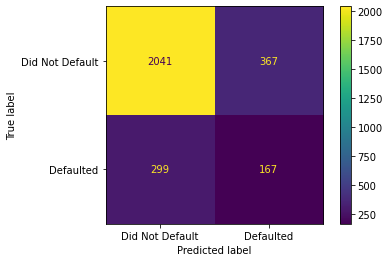

In [45]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(Votemodel, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [48]:
Results = pd.DataFrame({'NFPaid':y_test, 'NFPaid_Pred':y6_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = x_test_F1.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,...,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,NFPaid,NFPaid_Pred
3790,1,0.0768,93.58,11.156251,8.78,762,3630.000000,2211,6.2,0,...,0,0,0,1,0,0,0,0,0,0
1558,1,0.1209,399.09,10.126631,11.04,692,8435.041667,9931,29.6,0,...,0,0,0,1,0,0,0,0,1,0
3055,1,0.1411,684.58,12.154779,21.40,682,5430.000000,12531,30.1,2,...,0,0,0,1,0,0,0,0,0,0
7531,1,0.0788,375.37,10.668955,13.87,752,3901.041667,18183,33.2,1,...,0,0,1,0,0,0,0,0,0,0
5787,1,0.1253,60.24,10.577452,11.90,682,5190.041667,2496,56.7,3,...,1,1,0,0,0,0,0,0,0,0
9023,0,0.1758,898.55,10.915088,3.56,697,1109.958333,5341,24.0,5,...,0,0,0,0,0,0,1,0,1,0
6355,1,0.1218,599.40,11.350407,11.93,717,3240.000000,64394,80.7,0,...,0,0,0,1,0,0,0,0,0,0
2231,1,0.1221,204.89,10.288750,22.20,707,2378.041667,15509,53.5,1,...,0,0,1,0,0,0,0,0,0,1
3000,1,0.0932,247.59,11.302204,13.11,757,6090.000000,18540,29.6,0,...,0,0,1,0,0,0,0,0,0,0
6501,1,0.1287,840.83,11.967181,16.42,717,7200.041667,47643,82.6,1,...,0,0,0,1,0,0,0,0,0,0


# Second Problem - Universal Bank data

In [49]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

import pandasql as psql

# pip install pandasql

In [50]:
# Load the Universal bank data

bankdata = pd.read_csv(r"D:\00 Datasets\Bank\Universalbank.csv", header=0) 
bankdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [51]:
# Delete the columns which are not influencing the target variable

del bankdata['ID']
del bankdata['ZIP Code']

In [52]:
# cols1 is variables - crating a dummy variables

cols1 = ['Family', 'Education']
print(cols1)

['Family', 'Education']


In [53]:
# cols2 variables - MinMaxScalar function

cols2 = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
print(cols2)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']


In [54]:
# Create dummy variable for all range values

bankdata = pd.get_dummies(bankdata, columns=cols1)
bankdata.head().T

,0,1,2,3,4
Age,25.0,45.0,39.0,35.0,35.0
Experience,1.0,19.0,15.0,9.0,8.0
Income,49.0,34.0,11.0,100.0,45.0
CCAvg,1.6,1.5,1.0,2.7,1.0
Mortgage,0.0,0.0,0.0,0.0,0.0
Personal Loan,0.0,0.0,0.0,0.0,0.0
Securities Account,1.0,1.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0
Online,0.0,0.0,0.0,0.0,0.0
CreditCard,0.0,0.0,0.0,0.0,1.0


In [55]:
# Identify the dependent and Target variables

IndepVar = []
for col in bankdata.columns:
    if col != 'CreditCard':
        IndepVar.append(col)

TargetVar = 'CreditCard'

x = bankdata[IndepVar]
y = bankdata[TargetVar]

In [56]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)
x_test_F1 = x_test.copy()

# SVM Algorithm

In [57]:
# Training the SVM algorithm 

from sklearn.svm import SVC

modelSVMGaussian = SVC(kernel='rbf', random_state = None, class_weight=None,probability=True)
modelSVMGaussian.fit(x_train, y_train)

# Predicting the values

y1_pred = modelSVMGaussian.predict(x_test)

# Confusion matrix and classification report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y1_pred))
print(classification_report(y_test,y1_pred))

# Evalution metrics

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

print("Accuracy:", (round(metrics.accuracy_score(y_test, y1_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y1_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y1_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y1_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y1_pred), 3))

[[1073    0]
 [ 427    0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1073
           1       0.00      0.00      0.00       427

    accuracy                           0.72      1500
   macro avg       0.36      0.50      0.42      1500
weighted avg       0.51      0.72      0.60      1500

Accuracy: 71.53 %
Precision: 71.53 %
Recall: 71.53 %
f1-score: 71.53 %
roc_auc_score: 0.5


# RandomForest Algorithm

In [83]:
# Build Random Forest classification model and Train the model using the training sets

from sklearn.ensemble import RandomForestClassifier  

modelRF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                                 criterion='entropy', max_depth=3, max_features='auto',
                                 max_leaf_nodes=None, max_samples=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=300,
                                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                                 warm_start=False)

modelRF = modelRF.fit(x_train, y_train)

# Predict the model with test data set

y2_pred = modelRF.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y2_pred))
print(classification_report(y_test, y2_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y2_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y2_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y2_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y2_pred), 3))

[[1054   19]
 [ 356   71]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1073
           1       0.79      0.17      0.27       427

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy: 75.0 %
Precision: 75.0 %
Recall: 75.0 %
f1-score: 75.0 %
roc_auc_score: 0.574


# Decision Tree Algorithm

In [59]:
# To build the decision tree model with Over sampling 

from sklearn.tree import DecisionTreeClassifier 

modelDT = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                 max_depth=None, max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0, min_impurity_split=None,
                                 min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0,
                                 random_state=None, splitter='best')

modelDT = modelDT.fit(x_train,y_train)

# Predict with test data

y3_pred = modelDT.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y3_pred))
print(classification_report(y_test, y3_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y3_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y3_pred) * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y3_pred) * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y3_pred) * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y3_pred), 3))

[[777 296]
 [243 184]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1073
           1       0.38      0.43      0.41       427

    accuracy                           0.64      1500
   macro avg       0.57      0.58      0.57      1500
weighted avg       0.65      0.64      0.65      1500

Accuracy: 64.07 %
Precision: 38.33 %
Recall: 43.09 %
f1-score: 40.57 %
roc_auc_score: 0.578


# Logistic Regression Algorithm

In [60]:
# To build the 'Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                             intercept_scaling=1, max_iter=100, multi_class='auto', 
                             n_jobs=None, penalty='l2', random_state=None,
                             solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

modelLR = modelLR.fit(x_train,y_train)

# Predict the model with test data set

y4_pred = modelLR.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y4_pred))
print(classification_report(y_test, y4_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y4_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y4_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y4_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y4_pred), 3))

[[1053   20]
 [ 356   71]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1073
           1       0.78      0.17      0.27       427

    accuracy                           0.75      1500
   macro avg       0.76      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy: 74.93 %
Precision: 74.93 %
Recall: 74.93 %
f1-score: 74.93 %
roc_auc_score: 0.574


# Naive Bayes Algorithm

In [61]:
# To build the 'Naive Bayes' model with random sampling

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

modelGNB = modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y5_pred = modelGNB.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y5_pred))
print(classification_report(y_test, y5_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y5_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y5_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y5_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y5_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y5_pred), 3))

[[1053   20]
 [ 356   71]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1073
           1       0.78      0.17      0.27       427

    accuracy                           0.75      1500
   macro avg       0.76      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy: 74.93 %
Precision: 74.93 %
Recall: 74.93 %
f1-score: 74.93 %
roc_auc_score: 0.574


# KNN Algorithm

In [62]:
# Initialize an array that stores the Accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import classification_report, confusion_matrix

modelKNN = KNeighborsClassifier(n_neighbors=5)

modelKNN.fit(x_train, y_train)

y6_pred = modelKNN.predict(x_test)

print("Accuracy:", (round(metrics.accuracy_score(y_test, y6_pred) * 100, 2)), "%")
print("Precision:", (round(metrics.precision_score(y_test, y6_pred, average='micro') * 100, 2)), '%')
print("Recall:", (round(metrics.recall_score(y_test, y6_pred, average='micro') * 100, 2)), "%")
print("f1-score:", (round(metrics.f1_score(y_test, y6_pred, average='micro') * 100, 2)), '%')
print('roc_auc_score:', round(roc_auc_score(y_test, y6_pred), 3))
print(confusion_matrix(y_test, y6_pred))

Accuracy: 64.07 %
Precision: 64.07 %
Recall: 64.07 %
f1-score: 64.07 %
roc_auc_score: 0.5
[[887 186]
 [353  74]]


In [88]:
# "VotingClassifier” module in sklearn 

from sklearn.ensemble import VotingClassifier

Votemodel = VotingClassifier(estimators=[('lr', modelLR), ('dt', modelDT), ('gnb', modelGNB),
                                         ('rf', modelRF), ('knn', modelKNN)],
                             voting='hard', weights=None, flatten_transform=False)
Votemodel.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('gnb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=3,
                                                     n_estimators=300,
                                                     random_state=0)),
                             ('knn', KNeighborsClassifier())],
                 flatten_transform=False)

In [89]:
# Predict the model with test data set

y99_pred = Votemodel.predict(x_test)

# Display confusion matrix and classifiction report

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y99_pred))
print(classification_report(y_test, y99_pred))

# Evaluate the model performance by metrics

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", (round(metrics.accuracy_score(y_test, y99_pred) * 100, 2)), "%")

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", (round(metrics.precision_score(y_test, y99_pred, average='micro') * 100, 2)), '%')

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", (round(metrics.recall_score(y_test, y99_pred, average='micro') * 100, 2)), "%")

# Model f1-score: weighted average of Precision & Recall
print("f1-score:", (round(metrics.f1_score(y_test, y99_pred, average='micro') * 100, 2)), '%')

# Area under ROC curve 
print('roc_auc_score:', round(roc_auc_score(y_test, y99_pred), 3))

[[1054   19]
 [ 356   71]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1073
           1       0.79      0.17      0.27       427

    accuracy                           0.75      1500
   macro avg       0.77      0.57      0.56      1500
weighted avg       0.76      0.75      0.69      1500

Accuracy: 75.0 %
Precision: 75.0 %
Recall: 75.0 %
f1-score: 75.0 %
roc_auc_score: 0.574


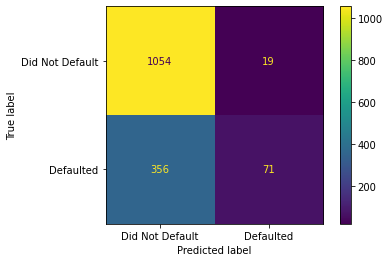

In [90]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(Votemodel, x_test, y_test, values_format='d', 
                      display_labels=['Did Not Default', 'Defaulted'])

In [91]:
Results = pd.DataFrame({'NFPaid':y_test, 'NFPaid_Pred':y6_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = x_test_F1.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,NFPaid,NFPaid_Pred
2275,40,16,115,3.40,0,0,0,0,1,1,0,0,0,1,0,0,0,0
1113,28,2,70,0.30,0,0,0,0,0,0,0,1,0,0,0,1,1,0
3968,28,3,78,0.20,0,0,0,0,1,0,0,0,1,1,0,0,1,1
2879,42,15,73,2.33,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4480,55,30,145,6.00,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1096,43,18,29,0.30,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4214,46,22,89,2.70,0,0,1,1,1,1,0,0,0,1,0,0,1,0
3095,49,25,43,1.60,0,0,0,0,1,1,0,0,0,0,1,0,1,0
1049,35,10,23,0.20,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4275,63,38,102,3.40,0,0,0,0,0,0,0,0,1,0,1,0,0,0
